# Metrics

In [54]:
import numpy as np
from sklearn.metrics import classification_report

In [55]:
class Metrics:
    
    def __init__(self, gt):
        self.gt = gt
        self.n = len(gt)
        
    def matrix(self, y_pred):
        gt = self.gt
        tp = np.count_nonzero(np.logical_and(gt == 1, gt == y_pred))
        fp = np.count_nonzero(np.logical_and(gt == 0, gt != y_pred))
        tn = np.count_nonzero(np.logical_and(gt == 0, gt == y_pred))
        fn = np.count_nonzero(np.logical_and(gt == 1, gt != y_pred))
        
        return tp, fp, tn, fn
        
    def accuracy(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return (tp + tn) / self.n
    
    def false_positives(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return fp
    
    def false_negatives(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return fn
    
    def recall(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return tp / (tp + fn)
    
    def precision(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return tp / (tp + fp)
        
    def false_negative_rate(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return fn / (fn + tp)
   
    def false_positive_rate(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return fp / (fp + tn)
    
    def true_positives(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return tp
             
    def true_positive_rate(self, y_pred):
        tp, fp, tn, fn = self.matrix(y_pred)
        return tp / (tp + fn)

In [56]:
path_pred = '/run/media/cozzy/data/FIT-PI/IKM/exc/exc2/data/csv/dataset1_ex_pred.csv'
path_y = '/run/media/cozzy/data/FIT-PI/IKM/exc/exc2/data/csv/dataset1_y_tst.csv'
pred = np.loadtxt(path_pred, delimiter=',')
y = np.loadtxt(path_y, delimiter=',')

In [57]:
np.count_nonzero(np.logical_and(y == 1, y == pred))

88

In [59]:
classification_report(y, pred, output_dict=True)

{'0.0': {'precision': 0.8536585365853658,
  'recall': 0.875,
  'f1-score': 0.8641975308641976,
  'support': 80},
 '1.0': {'precision': 0.8979591836734694,
  'recall': 0.88,
  'f1-score': 0.888888888888889,
  'support': 100},
 'accuracy': 0.8777777777777778,
 'macro avg': {'precision': 0.8758088601294176,
  'recall': 0.8775,
  'f1-score': 0.8765432098765433,
  'support': 180},
 'weighted avg': {'precision': 0.8782700071898678,
  'recall': 0.8777777777777778,
  'f1-score': 0.8779149519890261,
  'support': 180}}

In [60]:
print('accuracy: ', metrics.accuracy(pred))
print('false_positives: ', metrics.false_positives(pred))
print('false_negatives: ', metrics.false_negatives(pred))
print('recall: ', metrics.recall(pred))
print('precision: ', metrics.precision(pred))
print('false_negative_rate: ', metrics.false_negative_rate(pred))
print('false_positive_rate: ', metrics.false_positive_rate(pred))
print('true_positives: ', metrics.true_positives(pred))
print('true_positive_rate: ', metrics.true_positive_rate(pred))

accuracy:  0.8777777777777778
false_positives:  10
false_negatives:  12
recall:  0.88
precision:  0.8979591836734694
false_negative_rate:  0.12
false_positive_rate:  0.125
true_positives:  88
true_positive_rate:  0.88


# ROC

In [61]:
path_data = '/run/media/cozzy/data/FIT-PI/IKM/exc/exc2/data/csv/dataset2_data.csv'
path_lab = '/run/media/cozzy/data/FIT-PI/IKM/exc/exc2/data/csv/dataset2_labels.csv'
data = np.loadtxt(path_data, delimiter=',')
lab = np.loadtxt(path_lab, delimiter=',')

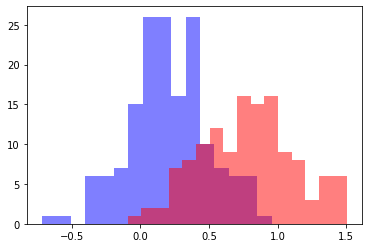

In [86]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 16
plt.hist(data[np.where(lab == 0)], num_bins, facecolor='blue', alpha=0.5)
plt.hist(data[np.where(lab == 1)], num_bins, facecolor='red', alpha=0.5)

plt.show()

In [63]:
def classify(x, th):
    return (x > th).astype(int)


In [64]:
data.min()
data.max()

1.5023

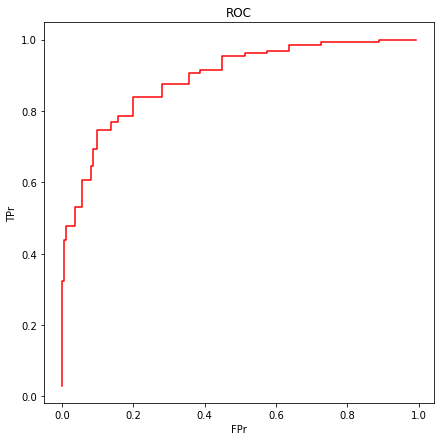

In [80]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

metrics2 = Metrics(lab)

points = []

for p in np.linspace(data.min(), data.max(), 50)[1:-1]:
    
    pred2 = classify(data, p)
    fpr = metrics2.false_positive_rate(pred2)
    tpr = metrics2.true_positive_rate(pred2)
    
    points.append([fpr, tpr])
    
pts = np.array(points)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.set_xlabel('FPr')
ax.set_ylabel('TPr')
plt.title('ROC')
plt.plot(pts[:,0], pts[:,1], ds='steps', c='red')